In [7]:
# Multiple Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataset = pd.read_csv(r"C:\Users\CL506_25\Documents\Newton\Datasets\Assignment 2 Advertising.csv")

In [11]:
dataset.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [22]:
dataset = dataset.iloc[: , 1:]
# The first represnt the rows, meaning select all rows and second means column where dont include the first column

In [23]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
dataset.shape

(200, 4)

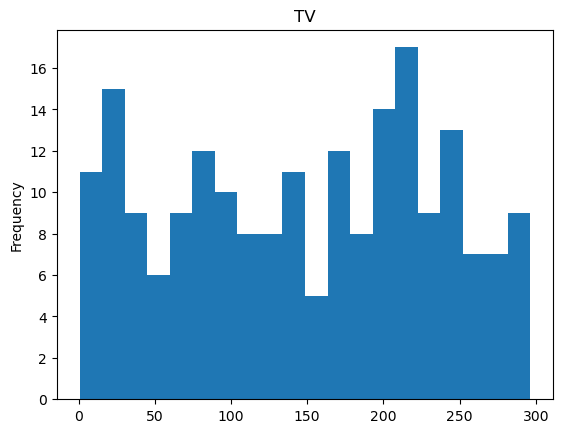

In [25]:
# TV
dataset['TV'].plot(kind = 'hist', bins = 20, title = 'TV')
plt.show()

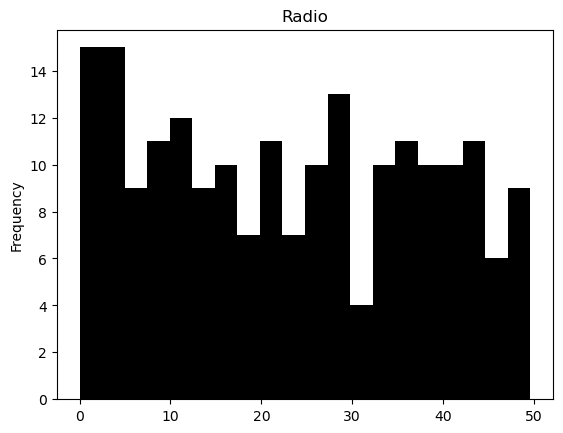

In [28]:
# Radio
dataset['Radio'].plot(kind = 'hist',color = "black", bins = 20, title = 'Radio')
plt.show()

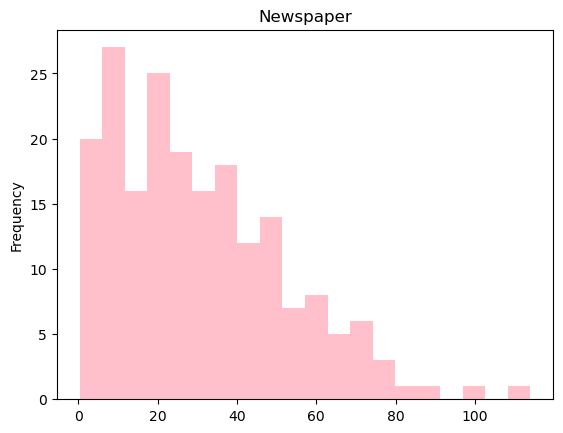

In [29]:
# Radio
dataset['Newspaper'].plot(kind = 'hist',color = "pink", bins = 20, title = 'Newspaper')
plt.show()

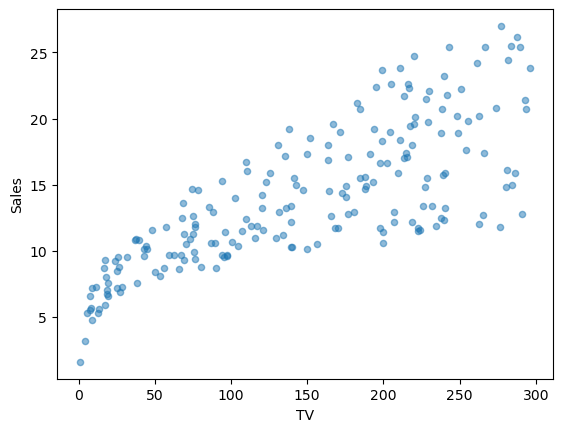

In [31]:
# TV vs Sales
dataset.plot(kind = 'scatter', x = 'TV', y = 'Sales', alpha = 0.5)
plt.show()

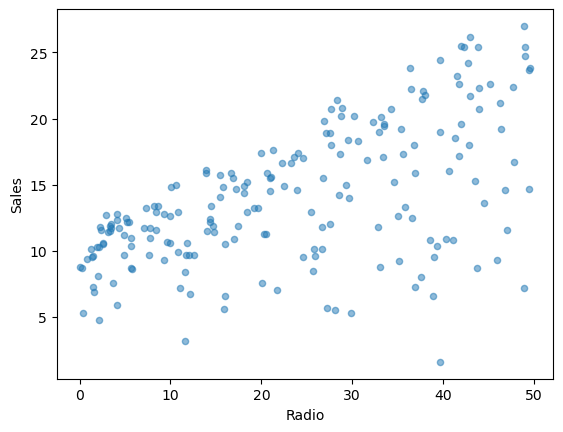

In [32]:
# Radio vs Sales
dataset.plot(kind = 'scatter', x = 'Radio', y = 'Sales', alpha = 0.5)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

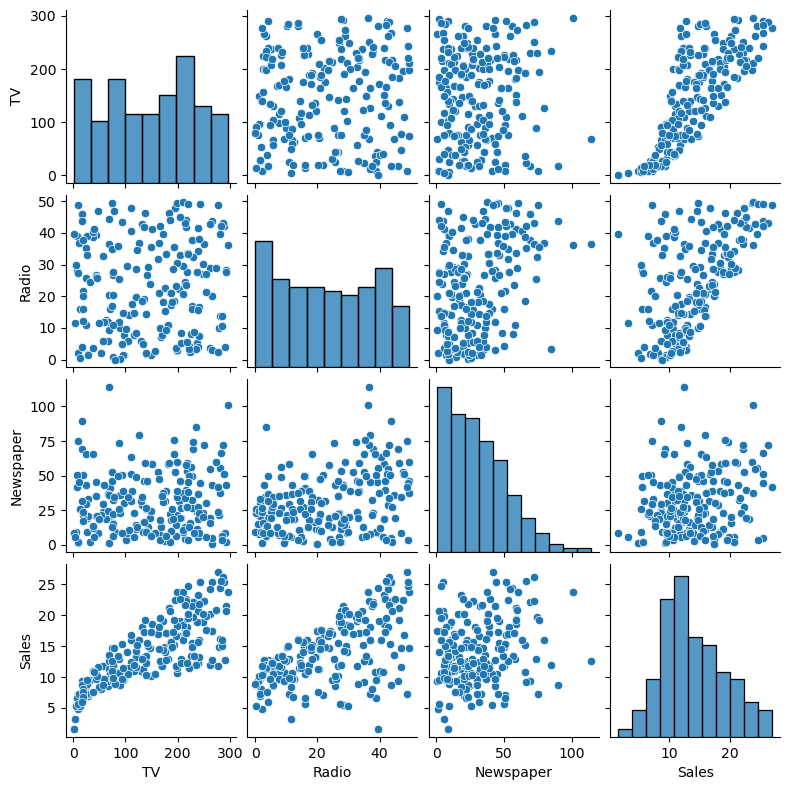

In [33]:
sns.pairplot(data = dataset, height = 2)

In [51]:
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 vif = pd.DataFrame()
 #vif['variables'] = X.columns
 vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 vif.index = X.columns
 return(vif)

In [56]:
X = df.iloc[:,:-1]
calc_vif(X)

,VIF
Unnamed: 0,2.609076
TV,3.106114
Radio,3.450875
Newspaper,3.086776


In [57]:
X.head()

,Unnamed: 0,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [60]:
#predict on the test data
y_pred = lr.predict(X_test)

In [61]:
#compute model slope and intercept

a = lr.coef_
b = lr.intercept_,
print("Estimated model coefficient, a :", a)
print("Estimated model intercept, b :", b)

list(zip(X, lr.coef_))

Estimated model coefficient, a : [0.00064359 0.04471835 0.18925118 0.00304577]
Estimated model intercept, b : (2.9065270863618036,)


[('Unnamed: 0', 0.0006435900404989916),
 ('TV', 0.04471835153028316),
 ('Radio', 0.18925118428501714),
 ('Newspaper', 0.0030457661251665122)]

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error: {:.4f}" .format(rmse))

Root Mean Square Error: 1.7886


In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score: {:.4f}" .format(r2))

R2 Score: 0.8986


In [64]:
lr_diff = pd.DataFrame({'Actual value': y_test['Sales'].values.flatten(), 'Predicted value': y_pred.flatten()}) # Access the 'Sales' column and use .values to get the underlying NumPy array before flattening
lr_diff.head()

KeyError: 'Sales'

In [65]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(lr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 89.65
Mean Absolute Error: 1.4650601050102925
Mean Square Error: 3.1990044685888988
Root Mean Square Error: 1.788576100865965


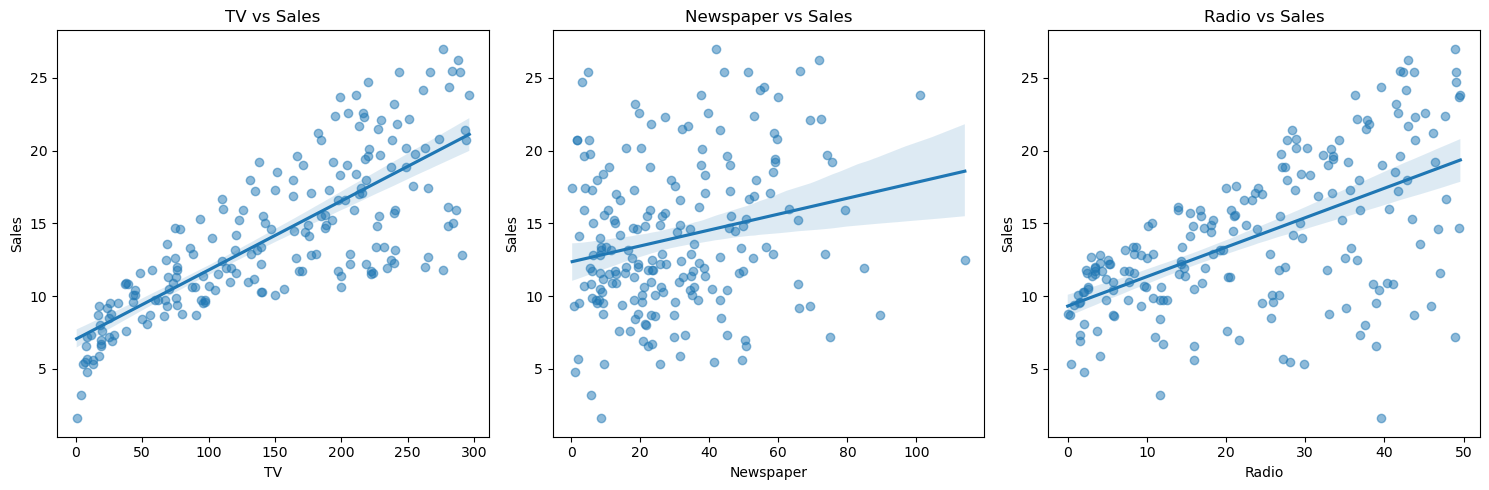

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# scatter plot for TV vs Sales
sns.regplot(x='TV', y='Sales', data=df, ax=axes[0], scatter_kws={'alpha':0.5})
axes[0].set_title('TV vs Sales')

# Scatter plot for Newspaper vs Sales
sns.regplot(x='Newspaper', y='Sales', data=df, ax=axes[1], scatter_kws={'alpha':0.5})
axes[1].set_title('Newspaper vs Sales')

# Scatter plot for Radio vs Sales
sns.regplot(x='Radio', y='Sales', data=df, ax=axes[2], scatter_kws={'alpha':0.5})
axes[2].set_title('Radio vs Sales')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()